In [8]:
import recordings_paths # for filling DataLoader
loader = recordings_paths.fill_loader(debug=False)

# Johanna10, Martin, Christoph, Alex, Matthias, Johannes, Caro
subjects = 'Johanna10, Martin, Christoph, Alex, Matthias, Johannes, Caro'.split(', ') # making list with subjects names
path_list = loader.get_data(subjects, debug=False) # get paths for train_subjects

sensors_lists = ['dist pos acc gyro'.split()]
sensors_list = sensors_lists[0]

fuse_slots = None

from data_prep import prep_data
sessions, targets, concat_data, concat_targets = prep_data(path_list, sensors_lists[0], fuse_slots, slot_filling=False, show_time = False, debug = False, deep_debug=False)

................................................................................................................
worked with 56 paths: 
['sample-20190308-142716-MM', 'sample-20190308-141659-MM', 'sample-20190308-140721-MM', 'sample-20190308-135244-MM', 'sample-20190311-172916-MM', 'sample-20190311-173906-MM', 'sample-20190311-175933-MM-lg', 'sample-20190311-181005-MM-kg', 'sample-20190311-181931-MM', 'sample-20190311-182841-MM', 'sample-20190301-224533-JP2', 'sample-20190301-225705-JP2', 'sample-20190301-230815-JP2', 'sample-20190301-231740-JP2', 'sample-20190302-153652-JP2', 'sample-20190302-155156-JP3', 'sample-20190302-160011-JP3', 'sample-20190302-160654-JP3', 'sample-20190302-161609-JP3', 'sample-20190302-163841-JP3', 'sample-20190304-103932-AR-g', 'sample-20190304-102614-AR-g', 'sample-20190317-144149-AR', 'sample-20190317-145711-AR', 'sample-20190317-150359-AR', 'sample-20190317-151444-AR', 'sample-20190317-152247-AR', 'sample-20190317-152937-AR', 'sample-20190317-153511-AR', 's

In [9]:
from rename_labels import get_opposites_out
concat_targets = [get_opposites_out[l] for l in concat_targets]

In [10]:
all_data = [slots.values for session in sessions for slots in session]

In [11]:
# take initials from subjects per session, blow them up per slot
# -> list with subject initials as group info for clf
# as long as list of all_data
# one subject initials per slot
len(all_data)

1176

In [12]:
path_list

['sample-20190308-142716-MM',
 'sample-20190308-141659-MM',
 'sample-20190308-140721-MM',
 'sample-20190308-135244-MM',
 'sample-20190311-172916-MM',
 'sample-20190311-173906-MM',
 'sample-20190311-175933-MM-lg',
 'sample-20190311-181005-MM-kg',
 'sample-20190311-181931-MM',
 'sample-20190311-182841-MM',
 'sample-20190301-224533-JP2',
 'sample-20190301-225705-JP2',
 'sample-20190301-230815-JP2',
 'sample-20190301-231740-JP2',
 'sample-20190302-153652-JP2',
 'sample-20190302-155156-JP3',
 'sample-20190302-160011-JP3',
 'sample-20190302-160654-JP3',
 'sample-20190302-161609-JP3',
 'sample-20190302-163841-JP3',
 'sample-20190304-103932-AR-g',
 'sample-20190304-102614-AR-g',
 'sample-20190317-144149-AR',
 'sample-20190317-145711-AR',
 'sample-20190317-150359-AR',
 'sample-20190317-151444-AR',
 'sample-20190317-152247-AR',
 'sample-20190317-152937-AR',
 'sample-20190317-153511-AR',
 'sample-20190317-155602-AR',
 'sample-20190311-122826-CA',
 'sample-20190312-182534-MJ-vg',
 'sample-20190312

In [13]:
[w[23:25] for w in path_list]

['MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'JP',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'AR',
 'CA',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'MJ',
 'JH',
 'JH',
 'JH',
 'JH',
 'JH',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD',
 'CD']

In [14]:
len(sessions)

56

In [15]:
len(sessions[0])

21

In [16]:
for session in sessions:
    print(len(session))

21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21


In [17]:
len(all_data)

1176

In [18]:
groups = []

counter = 1
for i_session, session in enumerate(sessions):
    initials = path_list[i_session][23:25]
    for i_slot, slot in enumerate(session):
        print(counter, i_session, i_slot, initials)
        groups.append(initials)
        counter += 1
    #print('-'*50)
#print('-'*100)

1 0 0 MM
2 0 1 MM
3 0 2 MM
4 0 3 MM
5 0 4 MM
6 0 5 MM
7 0 6 MM
8 0 7 MM
9 0 8 MM
10 0 9 MM
11 0 10 MM
12 0 11 MM
13 0 12 MM
14 0 13 MM
15 0 14 MM
16 0 15 MM
17 0 16 MM
18 0 17 MM
19 0 18 MM
20 0 19 MM
21 0 20 MM
22 1 0 MM
23 1 1 MM
24 1 2 MM
25 1 3 MM
26 1 4 MM
27 1 5 MM
28 1 6 MM
29 1 7 MM
30 1 8 MM
31 1 9 MM
32 1 10 MM
33 1 11 MM
34 1 12 MM
35 1 13 MM
36 1 14 MM
37 1 15 MM
38 1 16 MM
39 1 17 MM
40 1 18 MM
41 1 19 MM
42 1 20 MM
43 2 0 MM
44 2 1 MM
45 2 2 MM
46 2 3 MM
47 2 4 MM
48 2 5 MM
49 2 6 MM
50 2 7 MM
51 2 8 MM
52 2 9 MM
53 2 10 MM
54 2 11 MM
55 2 12 MM
56 2 13 MM
57 2 14 MM
58 2 15 MM
59 2 16 MM
60 2 17 MM
61 2 18 MM
62 2 19 MM
63 2 20 MM
64 3 0 MM
65 3 1 MM
66 3 2 MM
67 3 3 MM
68 3 4 MM
69 3 5 MM
70 3 6 MM
71 3 7 MM
72 3 8 MM
73 3 9 MM
74 3 10 MM
75 3 11 MM
76 3 12 MM
77 3 13 MM
78 3 14 MM
79 3 15 MM
80 3 16 MM
81 3 17 MM
82 3 18 MM
83 3 19 MM
84 3 20 MM
85 4 0 MM
86 4 1 MM
87 4 2 MM
88 4 3 MM
89 4 4 MM
90 4 5 MM
91 4 6 MM
92 4 7 MM
93 4 8 MM
94 4 9 MM
95 4 10 MM
96 4 11 MM
97 

792 37 14 MJ
793 37 15 MJ
794 37 16 MJ
795 37 17 MJ
796 37 18 MJ
797 37 19 MJ
798 37 20 MJ
799 38 0 MJ
800 38 1 MJ
801 38 2 MJ
802 38 3 MJ
803 38 4 MJ
804 38 5 MJ
805 38 6 MJ
806 38 7 MJ
807 38 8 MJ
808 38 9 MJ
809 38 10 MJ
810 38 11 MJ
811 38 12 MJ
812 38 13 MJ
813 38 14 MJ
814 38 15 MJ
815 38 16 MJ
816 38 17 MJ
817 38 18 MJ
818 38 19 MJ
819 38 20 MJ
820 39 0 MJ
821 39 1 MJ
822 39 2 MJ
823 39 3 MJ
824 39 4 MJ
825 39 5 MJ
826 39 6 MJ
827 39 7 MJ
828 39 8 MJ
829 39 9 MJ
830 39 10 MJ
831 39 11 MJ
832 39 12 MJ
833 39 13 MJ
834 39 14 MJ
835 39 15 MJ
836 39 16 MJ
837 39 17 MJ
838 39 18 MJ
839 39 19 MJ
840 39 20 MJ
841 40 0 MJ
842 40 1 MJ
843 40 2 MJ
844 40 3 MJ
845 40 4 MJ
846 40 5 MJ
847 40 6 MJ
848 40 7 MJ
849 40 8 MJ
850 40 9 MJ
851 40 10 MJ
852 40 11 MJ
853 40 12 MJ
854 40 13 MJ
855 40 14 MJ
856 40 15 MJ
857 40 16 MJ
858 40 17 MJ
859 40 18 MJ
860 40 19 MJ
861 40 20 MJ
862 41 0 JH
863 41 1 JH
864 41 2 JH
865 41 3 JH
866 41 4 JH
867 41 5 JH
868 41 6 JH
869 41 7 JH
870 41 8 JH
871 41 9 JH


In [19]:
groups

['MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',

In [20]:
len(all_data)

1176

In [21]:
len(concat_targets)

1176

In [22]:
len(groups)

1176

In [23]:
assert len(concat_data) == len(concat_targets) == len(groups), 'something went wrong: concat_data, concat_target and groups do not have same length: {} - {} - {}'.format(len(concat_data), len(concat_targets), len(groups))

In [24]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import time
import datetime

from metamux.dataset.dataset import Dataset
from metamux.classification.training_data import TrainingDataLoader
from metamux.classification import defaults, training_data_filter
from metamux.classification.features import peak_detection, smoothing, util, statistics, channel_select, differential
from metamux.classification.plot_cm import plot_cm
from metamux.classification.features import feature_selection
from metamux.classification import segment_feature_union

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from metamux.classification.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, cross_validate, LeaveOneOut, LeaveOneGroupOut, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

import Decoder # Preprocessor from JP

# to get dir_paths from final recordings
from os import listdir
from os.path import isfile, join

from plot_cm import plot_cm # Confusion Matrix from JH

from rename_labels import label_dict # dict with names for labels (Schrauben, Stift rein,...)
import recordings_paths # for filling DataLoader
from plot_data import plot_slot, make_cm_all, make_cm_tt # to plot line-plots and cm_plot from JH
from data_prep import prep_data, get_sensor_channels, select_sensor_channel

In [25]:
def np_flatten(ar):
    return ar.flatten()

# ACC + GYRO
pipe_all = Pipeline([
    #('ch_imu', channel_select.SegmentChannelSelectionTransformer(range(0, 6))), # von JH für Selektion zwischen IMU und Myo
    ('differential', segment_feature_union.SegmentFeatureUnion([ 
       ('identity', util.SegmentFunctionTransformer()),
       #('diff', differential.SegmentDiffTransformer()),
       #('int1', differential.SegmentIntTransformer()),
       #('int2', differential.SegmentInt2Transformer()),
    ])),
    ('features', FeatureUnion([
        ('min', util.SegmentFunctionTransformer(np.amin, {'axis': 0})),
        ('max', util.SegmentFunctionTransformer(np.amax, {'axis': 0})),
        ('mean', util.SegmentFunctionTransformer(np.mean, {'axis': 0})),
#             ('med', util.SegmentFunctionTransformer(np.median, {'axis': 0})),
#             ('rms', statistics.SegmentRMSTransformer()),
        #('std', util.SegmentFunctionTransformer(np.std, {'axis': 0})),
        #('var', util.SegmentFunctionTransformer(np.var, {'axis': 0})),
        #('q25', statistics.SegmentQuantilesTransformer(percentiles=[25])),
        #('q75', statistics.SegmentQuantilesTransformer(percentiles=[75])),
        #('zcc', statistics.SegmentZCCTransformer(offset=500)),
        #('skew', util.SegmentFunctionTransformer(scipy.stats.skew)),
        #('kurt', util.SegmentFunctionTransformer(scipy.stats.kurtosis)),
    ]))
])

# TODO Klassifikator auch ausgeben!! ------------------------------------------------------------

diff_features = pipe_all.steps[0][1].transformer_list
diff_features_list = [diff_feature[0] for diff_feature in diff_features]

stat_features = pipe_all.steps[1][1].transformer_list
stat_features_list = [stat_feature[0] for stat_feature in stat_features]


pipe = Pipeline([
    ('features', FeatureUnion([
        ('pipe_all', pipe_all)
        #('pipe_imu', pipe_imu),
        #('pipe_fsr', pipe_fsr),
    ])),
    ('flattening', util.SegmentFunctionTransformer(np_flatten)),
    #('standardscaler', StandardScaler()), # Either LDA or StandardScaler is required
    #('normalizer', Normablizer()), # Bad idea
    #('pca', PCA()), #n_components=15)),
    #('te', TestEstimator()),
    ('lda', LinearDiscriminantAnalysis()),
    #('lda', LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')),# JH special lda
    #('svm', SVC(C=1000, gamma=0.001, probability=True, kernel='rbf')),
    #('rf', RandomForestClassifier(n_estimators=100, max_features='auto')),
])

In [26]:
cv=LeaveOneGroupOut()

In [27]:
grids = [{}]
gs = GridSearchCV(pipe, grids, cv=cv, n_jobs=-1)

In [28]:
time_start = time.time()
gs.fit(all_data, concat_targets, groups=groups)
time_elapsed = time.time() - time_start

C:\Users\jpeham\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
print('Best Score: {}, Time: {}, Parameters: {}'.format(gs.best_score_, time_elapsed, gs.best_params_))
df = pd.DataFrame(gs.cv_results_)

Best Score: 0.7006802721088435, Time: 2.7037694454193115, Parameters: {}


C:\Users\jpeham\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jpeham\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jpeham\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jpeham\Anaconda3\lib\site-packages\sklearn\

In [30]:
groups

['MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',
 'MM',

In [31]:
cross_val_predicted = cross_val_predict(pipe, X=all_data, y=concat_targets, groups=groups, cv=cv)

In [32]:
acc = accuracy_score(concat_targets, cross_val_predicted)
print('Acuracy: {}'.format(acc*100))

Acuracy: 70.06802721088435


In [33]:
cm = confusion_matrix(concat_targets, cross_val_predicted)

Analysed sensors: , ['dist', 'pos', 'acc', 'gyro']
Differential features: , identity - Statistical features: , min, max, mean
Number of Sessions = 56
Subjects = , Johanna10, Martin, Christoph, Alex, Matthias, Johannes, Caro
Accuracy = 70.06802721088435
Mode = LOGO


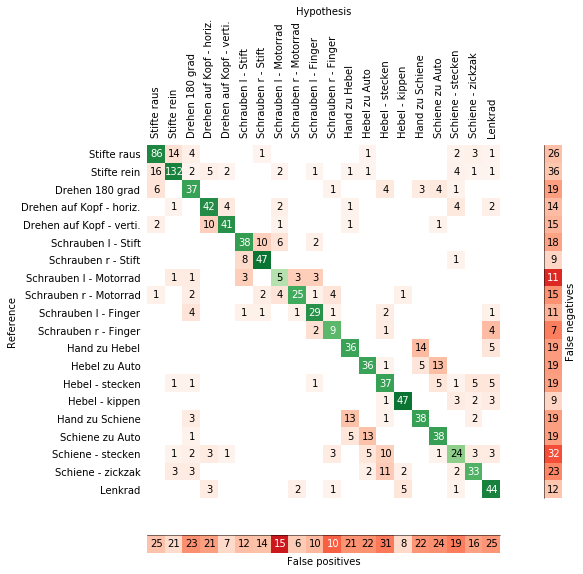

In [35]:
print('Analysed sensors: ', *sensors_lists, sep=", ")
print('Differential features: ', *diff_features_list, sep=", ", end=' - ')
print('Statistical features: ', *stat_features_list, sep=", ")

print('Number of Sessions = {}'.format(len(path_list)))

print('Subjects = ', *subjects, sep=", ")

plot_cm(concat_targets, cross_val_predicted, rename=label_dict)
print('Accuracy = {}'.format(accuracy_score(concat_targets, cross_val_predicted)*100))
print('Mode = LOGO')